In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
fields = df.iloc[:,[0, 1]].values
fields

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [4]:
wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 1)
    kmeans.fit(fields)
    
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

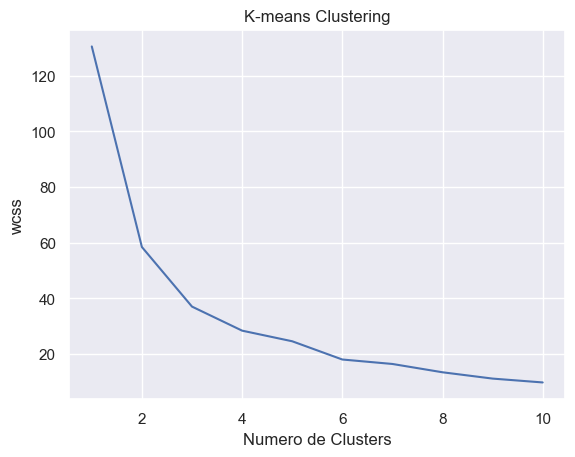

In [5]:
# Graficacion del "Codo de Jambu"
sns.set()
plt.plot(range(1,11), wcss)
plt.title('K-means Clustering')
plt.xlabel('Numero de Clusters')
plt.ylabel('wcss')

In [6]:
# Algoritmo k-means
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields)
cluster_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

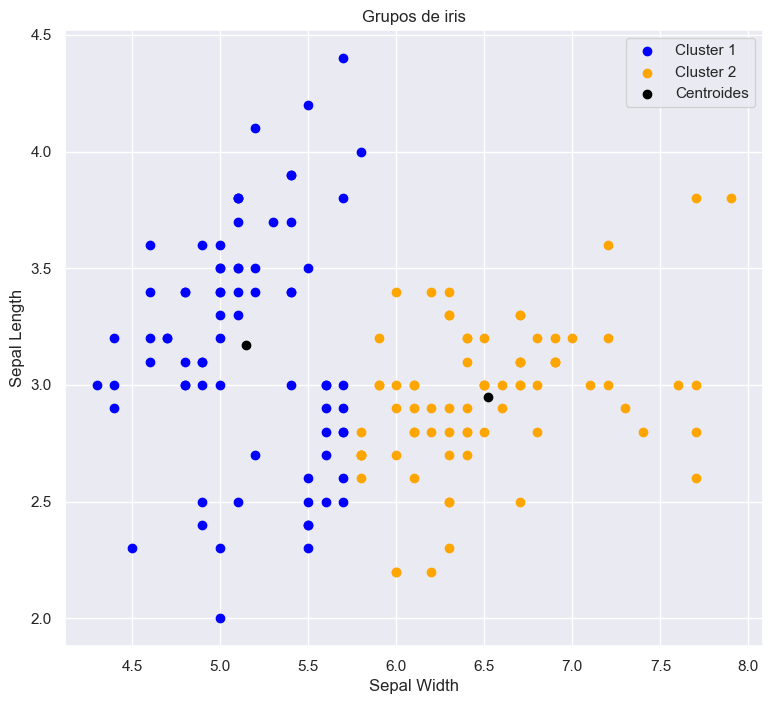

In [7]:
plt.figure(figsize = (9,8))
plt.scatter(fields[cluster_values == 0, 0], fields[cluster_values == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(fields[cluster_values == 1, 0], fields[cluster_values == 1, 1], c = 'orange', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')
plt.title("Grupos de iris")
plt.xlabel('Sepal Width')
plt.ylabel("Sepal Length")
plt.legend()

# Criterio de la silueta ("Silhouette")

In [9]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

x = df.iloc[:, [0, 1]].to_numpy()
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 42)    
    kmeans.fit_predict(x)
    # Score de Silueta
    score = silhouette_score(x, kmeans.labels_, metric = 'euclidean')
    print("Score Silhuoette:", "k = ", j, ":", score)

Score Silhuoette: k =  2 : 0.4644681851183547
Score Silhuoette: k =  3 : 0.4450525692083638
Score Silhuoette: k =  4 : 0.4028471317296809
Score Silhuoette: k =  5 : 0.34312790770010887
Score Silhuoette: k =  6 : 0.3901380642183856
Score Silhuoette: k =  7 : 0.4013232244605618
Score Silhuoette: k =  8 : 0.38847422344012994
Score Silhuoette: k =  9 : 0.37265574788548234
Score Silhuoette: k =  10 : 0.4023683501385767
Score Silhuoette: k =  11 : 0.41974951752865536


# Reduccion de los datos por PCA (Agrupacion por Caracteristicas Principales)

In [11]:
from sklearn import decomposition

fields2 = df.iloc[:, [0, 1, 2, 3]].values

pca = decomposition.PCA(n_components = 2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [12]:
wcss2 = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

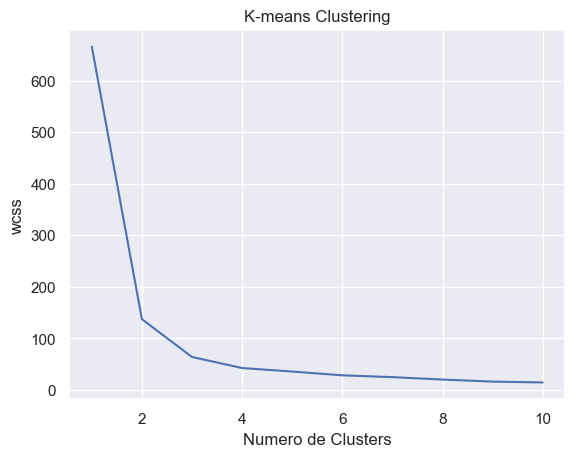

In [13]:
# Graficacion del "Codo de Jambu"
sns.set()
plt.plot(range(1,11), wcss2)
plt.title('K-means Clustering')
plt.xlabel('Numero de Clusters')
plt.ylabel('wcss')

In [14]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields2)
cluster_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

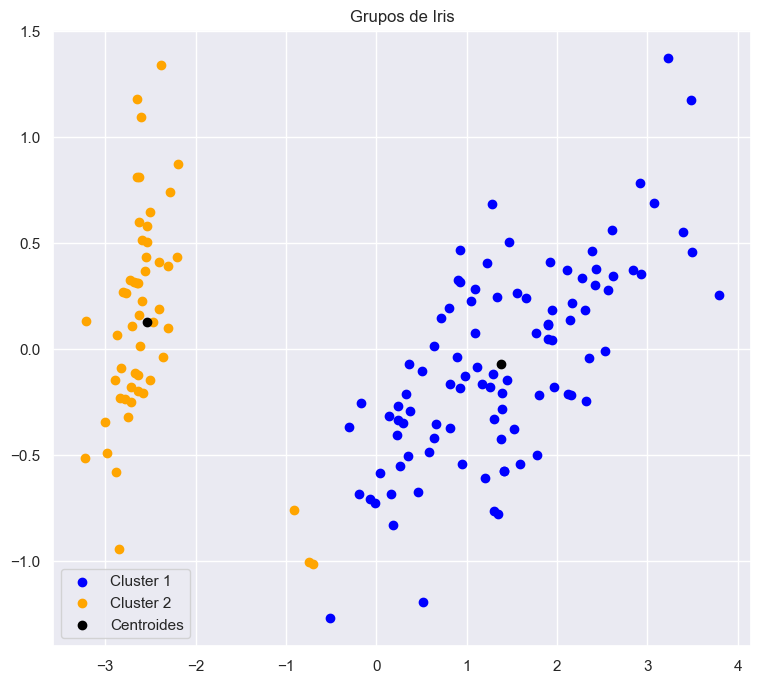

In [15]:
plt.figure(figsize = (9,8))
plt.scatter(fields2[cluster_values == 0, 0], fields2[cluster_values == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(fields2[cluster_values == 1, 0], fields2[cluster_values == 1, 1], c = 'orange', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')
plt.title("Grupos de Iris")
plt.legend()